In [1]:
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
x = 2*np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100, 1)), x]

In [4]:
y = 4 + 3 * x + np.random.randn(100, 1)
y

array([[  0.86159754],
       [ -8.06526683],
       [  2.91911012],
       [ 12.80513536],
       [-10.63678924],
       [ 14.83759918],
       [  8.25872309],
       [  4.4412094 ],
       [  1.39564689],
       [ -7.46246976],
       [  2.9118194 ],
       [ -4.53143337],
       [ -1.70941285],
       [  7.1244185 ],
       [  7.53074346],
       [  2.44947571],
       [ -1.2764872 ],
       [  5.64257963],
       [  0.7767941 ],
       [  5.47967162],
       [  2.14052216],
       [ -2.85689466],
       [ 10.26999927],
       [  8.58149296],
       [  2.58665392],
       [ -0.49977418],
       [ -0.10185982],
       [ -4.38188001],
       [  3.48989853],
       [ -2.95661992],
       [  2.20874714],
       [ 10.3960491 ],
       [  5.94528109],
       [ -2.78624469],
       [ -1.6575751 ],
       [  7.0084537 ],
       [  1.56605327],
       [  1.30207818],
       [  5.16800831],
       [  7.4463373 ],
       [ -7.42000072],
       [ -4.31025547],
       [  3.31202811],
       [ -0

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.95785046],
       [3.00699134]])

In [7]:
X_new = np.array([[0,2], [2,4]])

In [8]:
X_new

array([[0, 2],
       [2, 4]])

In [9]:
eta = 0.01 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
# random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[3.95785042],
       [3.00699133]])

In [11]:
n_epochs = 100
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
        

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96109712]), array([2.98363621]))

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.66277037])

In [16]:
X_poly[0]


array([2.66277037, 7.09034604])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9860112]), array([[1.00068304, 0.48175494]]))

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label="val")


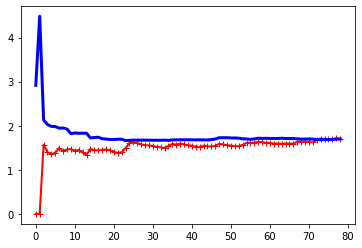

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [20]:
T = np.array([[10,23],[100,312]])

In [21]:
T[:,1:]

array([[ 23],
       [312]])

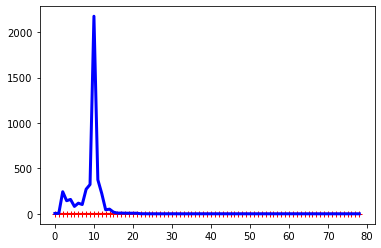

In [22]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
        ("lin_reg", LinearRegression(),)
    ]
)
plot_learning_curves(poly_reg, X, y)

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])



array([[5.01823709]])

In [24]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.02483914]])

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.98357633])

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.97902049])

In [27]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_reg.fit(X, y)
elastic_reg.predict([[1.5]]) 

array([4.97857308])

EARLY STOPPING

In [28]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m,1)-3
y = 2+X+ 0.5* X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.2, random_state=10)


In [29]:
float("inf")

inf

In [34]:

from sklearn.preprocessing import StandardScaler
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)



LOGISTIC REGRESSIN (Iris Dataset)

In [35]:
from sklearn import datasets
iris = datasets.load_iris();
list(iris.keys())
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [36]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)

/tmp/ipykernel_25183/1801981398.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"]==2).astype(np.int)


In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

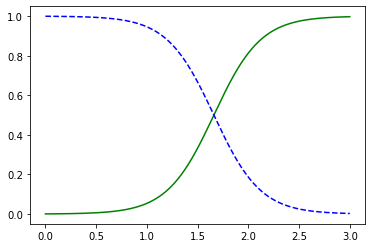

In [39]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="not iris virginica")
plt.show()

In [40]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

/usr/lib/python3.10/site-packages/matplotlib/patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


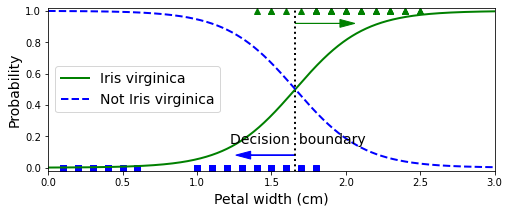

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

SOFTMAX REGRESSION

In [42]:
X = iris["data"][:,(2,3)]
y = iris["target"]


SOFTMAX REGRESSION + BATCH GRADIENT DESCENT + EARLY STOPPING


WITHOUT USING SCIKIT!!!!!!!

In [44]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]
X_with_bias.shape


(150, 3)

In [45]:
np.random.seed(2042)
def split_train_val_test(X, y, val_ratio, test_ratio):
    shuffled_indices = np.random.permutation(len(X_with_bias))
    test_size = int(test_ratio * len(X_with_bias))
    val_size = int(val_ratio * len(X_with_bias))
    train_size = len(X_with_bias) - val_size - test_size
    X_train = X_with_bias[shuffled_indices[:train_size]]
    y_train = y[shuffled_indices[:train_size]]
    X_val = X_with_bias[shuffled_indices[train_size:-test_size]]
    y_val = y[shuffled_indices[train_size:-test_size]]
    X_test = X_with_bias[shuffled_indices[-test_size:]]
    y_test = y[shuffled_indices[-test_size:]]
    return X_train, y_train, X_val, y_val, X_test, y_test


In [46]:

np.random.seed(2042)
X_train, y_train, X_val, y_val, X_test, y_test= split_train_val_test(X_with_bias,y,0.2,0.2)


In [47]:
def to_one_hot(y):
    num_classes = y.max()+1
    m = len(y)
    y_one_hot = np.zeros((m, num_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

In [48]:
one_hot = to_one_hot(y)
one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [49]:
y_train_onehot = to_one_hot(y_train)
y_val_onehot = to_one_hot(y_val)
y_test_onehot = to_one_hot(y_test)

In [50]:
def softmax(sk):
    exps = np.exp(sk)
    exps_sum = np.sum(exps,axis=1,keepdims=True)
    return exps/exps_sum

In [51]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [52]:
def cost(y,p_hat):
    return np.sum(y*np.log(p_hat), axis=1, keepdims=True)

In [53]:
eta =  0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

theta = np.random.randn(n_inputs, n_outputs)
for i in range(n_iterations):
    p_hat = softmax(X_train.dot(theta))
    if i % 500 == 0:
        J = -np.mean(np.sum(y_train_onehot * np.log(p_hat + epsilon), axis=1))
        l2_regu = 1/2*np.sum(np.square(theta[1:]))
        J_final = J + alpha * l2_regu
        print(f"iteration : {i}, cost : {J_final}")
    error = p_hat - y_train_onehot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

iteration : 0, cost : 5.592140037320312
iteration : 500, cost : 0.5306245494427259
iteration : 1000, cost : 0.50286065988396
iteration : 1500, cost : 0.4944096560199108
iteration : 2000, cost : 0.4911844121109969
iteration : 2500, cost : 0.4898515849864255
iteration : 3000, cost : 0.4892782613683091
iteration : 3500, cost : 0.48902588932473035
iteration : 4000, cost : 0.48891321650821723
iteration : 4500, cost : 0.48886245958850866
iteration : 5000, cost : 0.4888394608946073


In [54]:
theta

array([[ 4.2735645 ,  0.34170821, -4.9442355 ],
       [-1.0978215 ,  0.12531936,  0.97250213],
       [-0.43737125, -0.13644978,  0.57382102]])

In [55]:
p_hat = softmax(X_val.dot(theta))
y_hat = np.argmax(p_hat, axis=1)

accuracy_score = np.mean(y_hat == y_val)
accuracy_score

1.0

WITH EARLY STOPPING

In [56]:
eta =  0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_cost = np.Inf
theta = np.random.randn(n_inputs, n_outputs)
for i in range(n_iterations):
    p_hat = softmax(X_train.dot(theta))
    error = p_hat - y_train_onehot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

    p_hat = softmax(X_val.dot(theta))
    J = -np.mean(np.sum(y_val_onehot * np.log(p_hat + epsilon), axis=1))
    l2_regu = 1/2*np.sum(np.square(theta[1:]))
    J_final = J + alpha * l2_regu
    if i % 500 == 0:
        print(f"iteration : {i}, cost : {J_final}")
    if (best_cost > J_final):
        best_cost = J_final
    else:
        print(i - 1, best_cost)
        print(i, J_final, "early stopping!")
        break

iteration : 0, cost : 4.73772751867482
iteration : 500, cost : 0.5665936705360495
iteration : 1000, cost : 0.5416998332012444
iteration : 1500, cost : 0.5350529375648613
iteration : 2000, cost : 0.5330543544990184
iteration : 2500, cost : 0.5325716489587929
2701 0.5325452746042683
2702 0.5325452748471854 early stopping!


In [57]:
p_hat = softmax(X_val.dot(theta))
y_hat = np.argmax(p_hat, axis=1)

accuracy_score = np.mean(y_hat == y_val)
accuracy_score

1.0

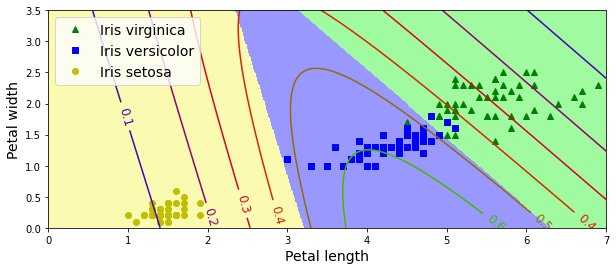

In [58]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

p_hat = softmax(X_new_with_bias.dot(theta))
y_hat = np.argmax(p_hat, axis=1)

zz1 = p_hat[:, 1].reshape(x0.shape)
zz = y_hat.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [59]:
p_hat = softmax(X_test.dot(theta))
y_hat = np.argmax(p_hat, axis=1)

accuracy_score = np.mean(y_hat == y_test)
accuracy_score

0.9333333333333333

array([0.        , 0.88888889, 1.77777778, 2.66666667, 3.55555556,
       4.44444444, 5.33333333, 6.22222222, 7.11111111, 8.        ])